# 小作业2 数据预处理

2021211313班 邓思阳 2021211352

## 作业1：爬取并存储链家的新房数据，并进行预处理

### 1.1 数据获取及存储

首先编写爬虫代码爬取 20 页新房信息，并写入 csv 文件，爬虫代码内容如下：

In [4]:
import requests
from lxml import etree
import csv
import time

# 伪造请求头
headers = {
    'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'
}

# 待写入csv的数据
data = []

# 爬取一页的楼盘信息
def get_loupan_info(url: str) -> None:
    # 获取网页内容，并解析为HTML
    response = requests.get(url, headers=headers)
    response.encoding = 'utf-8'
    html = etree.HTML(response.text)
    # 获取楼盘列表
    loupan_list = html.xpath('/html/body/div[3]/ul[2]/li')
    for loupan in loupan_list:
        # 名称
        name = loupan.xpath('./div/div[1]/a[1]/text()')[0].strip()
        # 类别
        type = loupan.xpath('./div/div[1]/span[1]/text()')[0].strip()
        # 地理位置
        location1 = loupan.xpath('./div/div[2]/span[1]/text()')[0].strip()
        location2 = loupan.xpath('./div/div[2]/span[2]/text()')[0].strip()
        location3 = loupan.xpath('./div/div[2]/a[1]/text()')[0].strip()
        # 户型
        try: # 有些楼盘缺失户型信息，需要跳过
            room = loupan.xpath('./div/a/span[1]/text()')[0].strip()
        except:
            print(f'"{name}"缺失户型信息，已跳过')
            continue
        # 面积
        try: # 有些楼盘缺失面积信息，需要跳过
            # 面积信息可能是一个范围，也可能是一个具体的数值，去掉数字以外无用信息，以'-'分割得到一个列表
            area_range = loupan.xpath('./div/div[3]/span[1]/text()')[0].strip().split(' ')[1][:-1].split('-')
            # 如果是一个范围，则取平均值；如果是一个具体的数值，则取该数值
            area = int(area_range[0]) if len(area_range) == 1 else (int(area_range[0]) + int(area_range[1])) // 2
        except:
            print(f'"{name}"缺失面积信息，已跳过')
            continue
        # 均价
        # 均价信息可能是一个范围，也可能是一个具体的数值，去掉数字以外无用信息，以'-'分割得到一个列表
        unit_price_range = loupan.xpath('./div/div[6]/div[1]/span[1]/text()')[0].strip().split('-')
        # 如果是一个范围，则取平均值；如果是一个具体的数值，则取该数值
        unit_price = int(unit_price_range[0]) if len(unit_price_range) == 1 else (int(unit_price_range[0]) + int(unit_price_range[1])) // 2
        # 总价
        try: # 有些楼盘缺失总价信息，需要跳过
            # 总价信息可能是一个范围，也可能是一个具体的数值，去掉数字以外无用信息，以'-'分割得到一个列表
            total_price_range = loupan.xpath('./div/div[6]/div[2]/text()')[0].strip().replace('总价', '').replace('(万/套)', '').split('-')
            # 如果是一个范围，则取平均值；如果是一个具体的数值，则取该数值
            total_price = int(total_price_range[0]) if len(total_price_range) == 1 else (int(total_price_range[0]) + int(total_price_range[1])) // 2
        except:
            print(f'"{name}"缺失总价信息，已跳过')
            continue
        # 将楼盘信息添加到待写入csv的数据中
        data.append([name, type, location1, location2, location3, room, area, unit_price, total_price])

# 爬取前20页的数据
for i in range(1, 21):
    print(f'正在爬取第{i}页...')
    url = 'https://bj.fang.lianjia.com/loupan/pg{n}/'.format(n=i)
    get_loupan_info(url)
    time.sleep(5) # 爬完一页后休息5秒，防止被反爬
print('爬取完成')

# 写入csv文件
print('正在写入csv文件...')
with open('loupan.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['name', 'type', 'location1', 'location2', 'location3', 'room', 'area', 'unit_price', 'total_price'])
    writer.writerows(data)
print('写入完成')

正在爬取第1页...
正在爬取第2页...
正在爬取第3页...
"京西悦府"缺失户型信息，已跳过
正在爬取第4页...
"永旺19街"缺失户型信息，已跳过
正在爬取第5页...
正在爬取第6页...
正在爬取第7页...
正在爬取第8页...
正在爬取第9页...
正在爬取第10页...
正在爬取第11页...
正在爬取第12页...
正在爬取第13页...
正在爬取第14页...
正在爬取第15页...
"德茂汇"缺失户型信息，已跳过
"德茂汇"缺失户型信息，已跳过
正在爬取第16页...
"端礼著"缺失户型信息，已跳过
正在爬取第17页...
正在爬取第18页...
"丽苑太和"缺失总价信息，已跳过
"朝青橙"缺失户型信息，已跳过
"尚峯壹号峯境"缺失户型信息，已跳过
正在爬取第19页...
"永旺19街"缺失户型信息，已跳过
"德茂汇"缺失户型信息，已跳过
"德茂汇"缺失户型信息，已跳过
"悦聚荟"缺失户型信息，已跳过
"梧桐金街"缺失户型信息，已跳过
"王府77"缺失户型信息，已跳过
"光熙金街"缺失户型信息，已跳过
"德胜合禧街"缺失户型信息，已跳过
正在爬取第20页...
"永旺19街"缺失户型信息，已跳过
"德茂汇"缺失户型信息，已跳过
"德茂汇"缺失户型信息，已跳过
"悦聚荟"缺失户型信息，已跳过
"梧桐金街"缺失户型信息，已跳过
"王府77"缺失户型信息，已跳过
"光熙金街"缺失户型信息，已跳过
"德胜合禧街"缺失户型信息，已跳过
爬取完成
正在写入csv文件...
写入完成


存储的 csv 文件为 `loupan.csv` ，内容如下（仅展示前50条）：

```
name,type,location1,location2,location3,room,area,unit_price,total_price
水岸壹号,别墅,房山,良乡,良乡大学城西站地铁南侧800米，刺猬河旁,3室,192,50000,1200
尚峯壹號,商业类,顺义,顺义其它,"中央别墅北区京承高速11号出口, 天承环路8号院",2室,233,27000,1050
运河铭著,住宅,通州,北关,商通大道与榆东一街交叉口，温榆河森林公园东500米,3室,153,49000,777
万年广阳郡九号,住宅,房山,长阳,长阳清苑南街与汇商东路交汇处西北角,4室,197,50000,1000
首开璞瑅隐园,住宅,丰台,方庄,紫芳园五区,4室,203,110000,2175
御汤山熙园,别墅,昌平,昌平其它,北京市昌平区小汤山镇顺沙路99号院,4室,418,40000,5401
天资华府,住宅,房山,长阳,房山区CSD政务大厅5号门,3室,155,38000,630
檀香府,别墅,门头沟,门头沟其它,京潭大街与潭柘十街交叉口,3室,264,42000,1250
韩建·观山源墅,别墅,房山,良乡,阳光北大街与多宝路交汇处西南（理工大学北校区西侧）,3室,310,40000,1250
北辰墅院1900,别墅,顺义,马坡,顺兴街11号院望尊园,4室,266,35000,1203
泰禾西府大院,住宅,丰台,丽泽,西三环丽泽桥西北角，玉璞公园东侧,5室,216,150000,3800
绿地海珀云翡,住宅,大兴,大兴其它,兴亦路京开高速东侧（黄村镇第一中心小学对面）,2室,143,65000,900
燕西华府,住宅,丰台,丰台其它,"王佐镇青龙湖公园东1500米,",3室,174,50000,520
水岸壹号,住宅,房山,良乡,良乡大学城西站地铁南侧800米，刺猬河旁,3室,137,48000,606
尊悦日坛,商业类,朝阳,朝阳门外,日坛北路19号,1室,45,66000,285
天恒摩墅,别墅,房山,房山其它,周口店镇政府东200米,3室,150,23000,390
鲁能·格拉斯小镇,别墅,通州,通州其它,北京市通州区宋庄镇格拉斯小镇营销中心,3室,349,62000,2032
兴创荣墅,别墅,大兴,大兴新机场洋房别墅区,北京市大兴区育胜街,3室,380,25000,1115
温哥华森林,别墅,昌平,北七家,"北五环外紧邻立汤路，北七家建材城向北第一个路口200米路东, 枫树家园6区, 枫树家园五区",5室,464,46000,2731
丽都壹号,住宅,朝阳,酒仙桥,"将台路与驼房营路交叉口向北150米, 将府家园北里",4室,123,90000,1674
北辰墅院1900,住宅,顺义,马坡,顺兴街11号院望尊园,3室,109,36000,430
燕西华府,别墅,丰台,丰台其它,"王佐镇青龙湖公园东1500米, 泉湖西路1号院（七区）, 泉湖西路1号院（六区）",3室,600,47000,2450
福景苑,住宅,朝阳,燕莎,亮马桥路46号,1室,206,83000,1775
合景寰汇公馆,住宅,通州,武夷花园,北京市通州区滨河中路西侧（合景寰汇公馆）,2室,97,35000,385
K2十里春风,住宅,通州,通州其它,北京市通州区,2室,82,23500,200
K2十里春风,别墅,通州,通州其它,北京市通州区,3室,155,28000,450
玺萌壹號院,别墅,丰台,草桥,西南三环嘉园路与镇国寺北街交叉口,5室,392,90000,4075
北京书院,住宅,朝阳,惠新西街,北京市朝阳区北土城东路辅路,2室,109,155000,1716
中铁华侨城和园,住宅,大兴,瀛海,南五环南海子公园西侧约500米,3室,169,60000,955
顺鑫颐和天璟,住宅,顺义,顺义其它,北京市顺义区牛栏山镇牛富路顺鑫颐和天璟禧润售楼中心,4室,165,28000,410
顺鑫颐和天璟,别墅,顺义,顺义其它,新城右堤路与昌金路交汇处向北200米,4室,382,28000,1075
北京城建北京合院,住宅,顺义,顺义其它,燕京街与通顺路交汇口东800米(仁和公园南),3室,112,46000,561
复地运河公馆,住宅,通州,武夷花园,通州运河核心区临滨河西路,2室,117,43000,550
北京城建北京合院,别墅,顺义,顺义其它,燕京街与通顺路交汇口东800米(仁和公园南),4室,270,39000,1150
月亮河七星公馆,住宅,通州,武夷花园,通燕高速耿庄桥出口南200米月亮河，河滨路1号,1室,82,68000,587
天润福熙大道,住宅,朝阳,北苑,"清河营东路1号院, 清河营东路3号院",1室,219,108000,2033
京贸国际公馆,住宅,通州,九棵树(家乐福),怡乐中路299号院（广渠快速路二期出口向南1000米）,1室,109,64000,722
凯德麓语,别墅,昌平,昌平其它,兴寿镇京承高速G11出口向西怀昌路北侧,3室,571,35000,2150
京贸国际城·峰景,住宅,通州,武夷花园,芙蓉东路1号（通燕高速耿庄桥北出口向南300米）,1室,104,68000,720
观唐云鼎,别墅,密云,溪翁庄镇,溪翁庄镇密溪路39号院（云佛山度假村对面）,3室,479,30000,1459
硅谷SOHO,商业类,昌平,南邵,京藏高速科技园出口（28出口）凉水河路,1室,58,20000,132
旭辉城,住宅,房山,房山其它,北京市房山区良锦街6号院旭辉城营销中心,2室,95,28500,274
檀香府,住宅,门头沟,门头沟其它,京潭大街与潭柘十街交叉口,3室,147,42000,640
泰禾金府大院,别墅,丰台,新宫,南四环地铁新宫站南800米,4室,433,75000,3200
和棠瑞著,别墅,平谷,平谷其它,金海湖景区坝前广场西侧500米,3室,332,16000,545
尊悦光华,住宅,朝阳,CBD,北京市朝阳区光华东里甲1号院3号楼,3室,152,150000,2500
首创·河著,别墅,顺义,顺义其它,京承高速11出口（昌金路）向东900 米路北,4室,279,38000,1550
华萃西山,住宅,门头沟,门头沟其它,永定镇地铁S1号线石厂西南700米,3室,118,48000,580
京西悦府,别墅,房山,阎村,北京市房山区燕房线阎村地铁站东南角约189米,3室,175,40000,740
中粮天恒天悦壹号,别墅,丰台,新宫,南四环地铁新宫站南500米,4室,280,80000,2180
...
```

### 1.2 数据预处理

#### 1.2.1 数据统计

首先使用 `pandas` 从 csv 文件中读入楼盘信息，内容如下：

In [4]:
import pandas as pd

# 读取csv文件
loupan = pd.read_csv('loupan.csv')

loupan

,name,type,location1,location2,location3,room,area,unit_price,total_price
0,水岸壹号,别墅,房山,良乡,良乡大学城西站地铁南侧800米，刺猬河旁,3室,192,50000,1200
1,尚峯壹號,商业类,顺义,顺义其它,"中央别墅北区京承高速11号出口, 天承环路8号院",2室,233,27000,1050
2,运河铭著,住宅,通州,北关,商通大道与榆东一街交叉口，温榆河森林公园东500米,3室,153,49000,777
3,万年广阳郡九号,住宅,房山,长阳,长阳清苑南街与汇商东路交汇处西北角,4室,197,50000,1000
4,首开璞瑅隐园,住宅,丰台,方庄,紫芳园五区,4室,203,110000,2175
...,...,...,...,...,...,...,...,...,...
211,公园和御,住宅,顺义,顺义其它,顺泰路公园和御,2室,93,39000,357
212,中海云庭,住宅,石景山,石景山其它,北京市石景山古城南街东侧,3室,106,74800,790
213,中海汇智里,住宅,昌平,昌平其它,满白路中海汇智里,1室,89,50000,450
214,中海长安誉,住宅,石景山,古城,北京市石景山区老古城前街55号,4室,139,75800,1015


- 找出总价最贵和最便宜的房子,以及总价的中位数

In [5]:
# 按照总价排序
loupan_sorted_by_total_price = loupan.sort_values(by='total_price', ascending=False).reset_index(drop=True)

loupan_sorted_by_total_price

,name,type,location1,location2,location3,room,area,unit_price,total_price
0,北京庄园,别墅,顺义,顺义其它,京承高速第11出口往东800米,4室,1195,115000,12950
1,懋源·璟岳,别墅,丰台,玉泉营,南三环西路99号院,4室,527,140000,7750
2,御汤山熙园,别墅,昌平,昌平其它,北京市昌平区小汤山镇顺沙路99号院,4室,418,40000,5401
3,懋源·璟玺,别墅,朝阳,中央别墅区,孙河京密路与京平辅路交叉口西行1000米,4室,608,100000,5140
4,泰禾西府大院,住宅,丰台,丽泽,西三环丽泽桥西北角，玉璞公园东侧,5室,216,150000,3800
...,...,...,...,...,...,...,...,...,...
211,悦谷新城,住宅,怀柔,怀柔,富密路悦谷新城家园,2室,102,20000,210
212,住总兴创如遇,住宅,大兴,大兴新机场洋房别墅区,采华路与育镇街交叉路口往西北约100米(采育文化广场西南侧约100米),1室,84,28000,201
213,禧瑞金海,住宅,平谷,平谷其它,平蓟路与环镇东路交汇,2室,98,22000,200
214,K2十里春风,住宅,通州,通州其它,北京市通州区,2室,82,23500,200


In [6]:
print('总价最贵的房子：\t', ','.join(map(str, loupan_sorted_by_total_price.head(1).values.tolist()[0])))
print('总价最便宜的房子：\t', ','.join(map(str, loupan_sorted_by_total_price.tail(1).values.tolist()[0])))

总价最贵的房子：	 北京庄园,别墅,顺义,顺义其它,京承高速第11出口往东800米,4室,1195,115000,12950
总价最便宜的房子：	 硅谷SOHO,商业类,昌平,南邵,京藏高速科技园出口（28出口）凉水河路,1室,58,20000,132


In [7]:
# 求总价中位数
total_price_median = loupan_sorted_by_total_price["total_price"].median()

print(f'总价中位数：{total_price_median}')

总价中位数：731.0


- 找出均价最贵和最便宜的房子,以及均价的中位数

In [8]:
# 按照均价排序
loupan_sorted_by_unit_price = loupan.sort_values(by='unit_price', ascending=False).reset_index(drop=True)

loupan_sorted_by_unit_price

,name,type,location1,location2,location3,room,area,unit_price,total_price
0,北京书院,住宅,朝阳,惠新西街,北京市朝阳区北土城东路辅路,2室,109,155000,1716
1,泰禾西府大院,住宅,丰台,丽泽,西三环丽泽桥西北角，玉璞公园东侧,5室,216,150000,3800
2,泰禾西府大院,住宅,丰台,丽泽,西三环丽泽桥西北角，玉璞公园东侧,5室,216,150000,3800
3,泰禾西府大院,住宅,丰台,丽泽,西三环丽泽桥西北角，玉璞公园东侧,5室,216,150000,3800
4,尊悦光华,住宅,朝阳,CBD,北京市朝阳区光华东里甲1号院3号楼,3室,152,150000,2500
...,...,...,...,...,...,...,...,...,...
211,阳光城溪山悦,别墅,密云,密云其它,密溪路33号,2室,214,20000,410
212,阳光城溪山悦,别墅,密云,密云其它,密溪路33号,2室,214,20000,410
213,悦谷新城,住宅,怀柔,怀柔,富密路悦谷新城家园,2室,102,20000,210
214,硅谷SOHO,商业类,昌平,南邵,京藏高速科技园出口（28出口）凉水河路,1室,58,20000,132


In [9]:
print('均价最贵的房子：\t', ','.join(map(str, loupan_sorted_by_unit_price.head(1).values.tolist()[0])))
print('均价最便宜的房子：\t', ','.join(map(str, loupan_sorted_by_unit_price.tail(1).values.tolist()[0])))

均价最贵的房子：	 北京书院,住宅,朝阳,惠新西街,北京市朝阳区北土城东路辅路,2室,109,155000,1716
均价最便宜的房子：	 和棠瑞著,别墅,平谷,平谷其它,金海湖景区坝前广场西侧500米,3室,332,16000,545


In [10]:
unit_price_median = loupan_sorted_by_unit_price["unit_price"].median()

print(f'均价中位数：{unit_price_median}')

均价中位数：50000.0


#### 1.2.2 异常值处理

- 列出总价在均值三倍标准差以外的房屋,展示其基本信息(如果太多可以只展示一部分),并分析其原因(找4条数据即可)

In [11]:
# 求总价均值和标准差
total_price_mean = loupan['total_price'].mean()
total_price_std = loupan['total_price'].std()

print(f'总价均值：{total_price_mean}')
print(f'总价标准差：{total_price_std}')

总价均值：1110.388888888889
总价标准差：1270.2784850013654


In [12]:
# 求总价异常值上界和下界
upperbound = total_price_mean + 3 * total_price_std
lowerbound = total_price_mean - 3 * total_price_std

print(f'总价异常值上界：{upperbound}')
print(f'总价异常值下界：{lowerbound}')

总价异常值上界：4921.224343892985
总价异常值下界：-2700.446566115207


In [13]:
# 筛选出总价在均值±3倍标准差之外的楼盘
exception = loupan[(loupan['total_price'] > upperbound) | (loupan['total_price'] < lowerbound)].reset_index(drop=True)

exception

,name,type,location1,location2,location3,room,area,unit_price,total_price
0,御汤山熙园,别墅,昌平,昌平其它,北京市昌平区小汤山镇顺沙路99号院,4室,418,40000,5401
1,懋源·璟岳,别墅,丰台,玉泉营,南三环西路99号院,4室,527,140000,7750
2,懋源·璟玺,别墅,朝阳,中央别墅区,孙河京密路与京平辅路交叉口西行1000米,4室,608,100000,5140
3,北京庄园,别墅,顺义,顺义其它,京承高速第11出口往东800米,4室,1195,115000,12950


筛选可以看出总价在均值三倍标准差之外的楼盘只有四个，如上所示。

- 通过箱型图原则判断并列出均价为异常值的房屋,展示其基本信息(如果太多可以只展示一部分),并分析其原因(找4条数据即可)

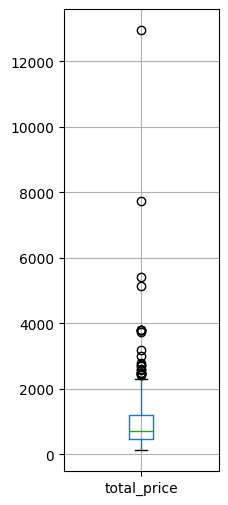

In [42]:
import matplotlib.pyplot as plt

# 绘制总价箱线图
plt.figure(figsize=(2, 6))
boxplot = loupan.boxplot(column=['total_price'], return_type='dict')
plt.show()

绘制出总价的箱线图，获取箱线图正常数据的上下边界，然后筛选出异常行，如下所示：

In [52]:
# 获取箱线图的上下边界值
upper_bound = boxplot['whiskers'][1].get_ydata()[1]
lower_bound = boxplot['whiskers'][0].get_ydata()[1]

print(f'正常数据上界：{upper_bound}')
print(f'正常数据下界：{lower_bound}')

正常数据上界：2300.0
正常数据下界：132.0


In [54]:
# 筛选异常行
outliers = loupan[(loupan['total_price'] > upper_bound) | (loupan['total_price'] < lower_bound)]

# 按照总价排序
outliers.sort_values(by='total_price', ascending=False).reset_index(drop=True)

,name,type,location1,location2,location3,room,area,unit_price,total_price
0,北京庄园,别墅,顺义,顺义其它,京承高速第11出口往东800米,4室,1195,115000,12950
1,懋源·璟岳,别墅,丰台,玉泉营,南三环西路99号院,4室,527,140000,7750
2,御汤山熙园,别墅,昌平,昌平其它,北京市昌平区小汤山镇顺沙路99号院,4室,418,40000,5401
3,懋源·璟玺,别墅,朝阳,中央别墅区,孙河京密路与京平辅路交叉口西行1000米,4室,608,100000,5140
4,泰禾西府大院,住宅,丰台,丽泽,西三环丽泽桥西北角，玉璞公园东侧,5室,216,150000,3800
5,泰禾西府大院,住宅,丰台,丽泽,西三环丽泽桥西北角，玉璞公园东侧,5室,216,150000,3800
6,泰禾西府大院,住宅,丰台,丽泽,西三环丽泽桥西北角，玉璞公园东侧,5室,216,150000,3800
7,玺萌壹號院,别墅,丰台,草桥,西南三环嘉园路与镇国寺北街交叉口,5室,392,90000,3795
8,葛洲坝中国府,别墅,丰台,玉泉营,丰台东路46号,4室,470,125000,3750
9,泰禾金府大院,别墅,丰台,新宫,南四环地铁新宫站南800米,4室,433,75000,3200


数据异常的原因是超过了箱线图原则规定的异常值范围。

异常值通常被定义为超过数据的1.5倍四分位距（即Q3减去Q1的1.5倍）的值。

#### 1.2.3 离散化处理

- 对房屋的均价进行离散化处理,自行设定每个区间的长度并给出设置的理由,给出每个区间的房屋数量和所占比例

选定每个区间长度为 20000 元，区间个数较为合适。边界以整万元划分，便于直观看到不同价位房子的占比。

In [76]:
bin_length = 20000 # 区间长度
min_price = loupan['unit_price'].min() # 最小房屋均价
max_price = loupan['unit_price'].max() # 最大房屋均价

# 自定义区间划分边界
bins = [min_price, 20000, 40000, 60000, 80000, 100000, 120000, 140000, max_price]

# 进行离散化处理
unit_price_discretized = pd.cut(loupan['unit_price'], bins=bins)

# 统计各区间的楼盘数量
bin_counts = unit_price_discretized.value_counts().sort_index()

bin_counts

unit_price
(16000, 20000]       6
(20000, 40000]      70
(40000, 60000]      61
(60000, 80000]      46
(80000, 100000]     12
(100000, 120000]     7
(120000, 140000]     8
(140000, 155000]     5
Name: count, dtype: int64

In [77]:
# 计算各区间的楼盘数量占比
bin_proportions = bin_counts / len(loupan) * 100

bin_proportions

unit_price
(16000, 20000]       2.777778
(20000, 40000]      32.407407
(40000, 60000]      28.240741
(60000, 80000]      21.296296
(80000, 100000]      5.555556
(100000, 120000]     3.240741
(120000, 140000]     3.703704
(140000, 155000]     2.314815
Name: count, dtype: float64

In [78]:
# 输出结果
for i, bin_range in enumerate(bin_counts.index):
    print("区间 ({l}, {r}]: 房屋数量 {num}, 占比 {p:.2f}%"
          .format(l=bins[i], r=bins[i + 1], num=bin_counts[bin_range], p=bin_proportions[bin_range]))

区间 (16000, 20000]: 房屋数量 6, 占比 2.78%
区间 (20000, 40000]: 房屋数量 70, 占比 32.41%
区间 (40000, 60000]: 房屋数量 61, 占比 28.24%
区间 (60000, 80000]: 房屋数量 46, 占比 21.30%
区间 (80000, 100000]: 房屋数量 12, 占比 5.56%
区间 (100000, 120000]: 房屋数量 7, 占比 3.24%
区间 (120000, 140000]: 房屋数量 8, 占比 3.70%
区间 (140000, 155000]: 房屋数量 5, 占比 2.31%


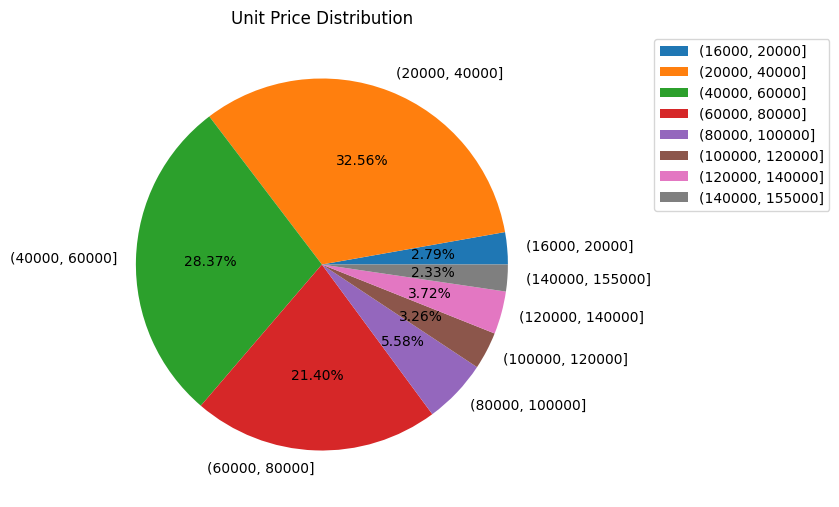

In [75]:
# 绘制扇形图
plt.figure(figsize=(6, 10))
plt.pie(bin_proportions, labels=bin_counts.index, autopct='%1.2f%%')
plt.legend(bbox_to_anchor=(1.2, 1.0))
plt.title('Unit Price Distribution')
plt.show()

## 作业2：分析处理2015年北京市PM2.5指数数据集空值

### 2.1 数据抽取及存储

从原始数据集中抽取 2015 年度数据,存储为新的 csv 文件

In [79]:
import pandas as pd

# 读取csv文件
beijingPM = pd.read_csv('BeijingPM20100101_20151231.csv')

beijingPM

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,52580,2015,12,31,19,4,140.0,157.0,122.0,133.0,-8.0,68.0,1031.0,-3.0,SE,7.14,0.0,0.0
52580,52581,2015,12,31,20,4,157.0,199.0,149.0,169.0,-8.0,63.0,1030.0,-2.0,SE,8.03,0.0,0.0
52581,52582,2015,12,31,21,4,171.0,231.0,196.0,203.0,-10.0,73.0,1030.0,-6.0,NE,0.89,0.0,0.0
52582,52583,2015,12,31,22,4,204.0,242.0,221.0,212.0,-10.0,73.0,1030.0,-6.0,NE,1.78,0.0,0.0


In [80]:
# 抽取2015年的数据
beijingPM_2015 = beijingPM[beijingPM['year'] == 2015].reset_index(drop=True)

beijingPM_2015

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,43825,2015,1,1,0,4,5.0,32.0,8.0,22.0,-21.0,29.0,1034.0,-6.0,SE,0.89,0.0,0.0
1,43826,2015,1,1,1,4,4.0,12.0,7.0,9.0,-22.0,23.0,1034.0,-4.0,NW,4.92,0.0,0.0
2,43827,2015,1,1,2,4,3.0,19.0,7.0,9.0,-21.0,27.0,1034.0,-5.0,NW,8.94,0.0,0.0
3,43828,2015,1,1,3,4,4.0,9.0,11.0,13.0,-21.0,29.0,1035.0,-6.0,NW,12.96,0.0,0.0
4,43829,2015,1,1,4,4,3.0,11.0,5.0,10.0,-21.0,27.0,1034.0,-5.0,NW,16.98,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,52580,2015,12,31,19,4,140.0,157.0,122.0,133.0,-8.0,68.0,1031.0,-3.0,SE,7.14,0.0,0.0
8756,52581,2015,12,31,20,4,157.0,199.0,149.0,169.0,-8.0,63.0,1030.0,-2.0,SE,8.03,0.0,0.0
8757,52582,2015,12,31,21,4,171.0,231.0,196.0,203.0,-10.0,73.0,1030.0,-6.0,NE,0.89,0.0,0.0
8758,52583,2015,12,31,22,4,204.0,242.0,221.0,212.0,-10.0,73.0,1030.0,-6.0,NE,1.78,0.0,0.0


In [81]:
# 存储为新的csv文件
with open('BeijingPM2015.csv', 'w', newline='', encoding='utf-8') as f:
    beijingPM_2015.to_csv(f, index=False)

新的csv文件内容如下（只展示前50条数据）：

```
No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
43825,2015,1,1,0,4,5.0,32.0,8.0,22.0,-21.0,29.0,1034.0,-6.0,SE,0.89,0.0,0.0
43826,2015,1,1,1,4,4.0,12.0,7.0,9.0,-22.0,23.0,1034.0,-4.0,NW,4.92,0.0,0.0
43827,2015,1,1,2,4,3.0,19.0,7.0,9.0,-21.0,27.0,1034.0,-5.0,NW,8.94,0.0,0.0
43828,2015,1,1,3,4,4.0,9.0,11.0,13.0,-21.0,29.0,1035.0,-6.0,NW,12.96,0.0,0.0
43829,2015,1,1,4,4,3.0,11.0,5.0,10.0,-21.0,27.0,1034.0,-5.0,NW,16.98,0.0,0.0
43830,2015,1,1,5,4,3.0,18.0,3.0,6.0,-22.0,23.0,1034.0,-4.0,NW,24.13,0.0,0.0
43831,2015,1,1,6,4,3.0,20.0,6.0,8.0,-23.0,22.0,1034.0,-5.0,NW,25.92,0.0,0.0
43832,2015,1,1,7,4,3.0,22.0,7.0,17.0,-22.0,26.0,1035.0,-6.0,SE,1.79,0.0,0.0
43833,2015,1,1,8,4,,,,11.0,-22.0,29.0,1035.0,-7.0,cv,0.89,0.0,0.0
43834,2015,1,1,9,4,5.0,37.0,11.0,33.0,-22.0,24.0,1035.0,-5.0,NE,1.79,0.0,0.0
43835,2015,1,1,10,4,4.0,37.0,36.0,37.0,-22.0,21.0,1035.0,-3.0,NE,4.92,0.0,0.0
43836,2015,1,1,11,4,21.0,40.0,40.0,40.0,-22.0,19.0,1034.0,-2.0,cv,1.79,0.0,0.0
43837,2015,1,1,12,4,41.0,63.0,61.0,63.0,-22.0,17.0,1032.0,0.0,cv,3.58,0.0,0.0
43838,2015,1,1,13,4,40.0,58.0,54.0,62.0,-22.0,16.0,1030.0,1.0,SE,3.13,0.0,0.0
43839,2015,1,1,14,4,28.0,48.0,53.0,44.0,-23.0,13.0,1029.0,2.0,SE,6.26,0.0,0.0
43840,2015,1,1,15,4,29.0,42.0,41.0,48.0,-23.0,13.0,1028.0,2.0,SE,9.39,0.0,0.0
43841,2015,1,1,16,4,31.0,53.0,51.0,51.0,-24.0,12.0,1027.0,2.0,SE,13.41,0.0,0.0
43842,2015,1,1,17,4,52.0,68.0,68.0,82.0,-23.0,14.0,1027.0,1.0,SE,16.54,0.0,0.0
43843,2015,1,1,18,4,64.0,85.0,81.0,87.0,-21.0,20.0,1026.0,-1.0,SE,19.67,0.0,0.0
43844,2015,1,1,19,4,75.0,94.0,88.0,106.0,-19.0,25.0,1026.0,-2.0,cv,0.89,0.0,0.0
43845,2015,1,1,20,4,82.0,107.0,100.0,123.0,-19.0,34.0,1026.0,-6.0,NE,1.79,0.0,0.0
43846,2015,1,1,21,4,88.0,138.0,102.0,136.0,-19.0,40.0,1026.0,-8.0,NE,2.68,0.0,0.0
43847,2015,1,1,22,4,86.0,158.0,124.0,139.0,-18.0,38.0,1026.0,-6.0,NW,1.79,0.0,0.0
43848,2015,1,1,23,4,80.0,175.0,134.0,154.0,-17.0,48.0,1027.0,-8.0,NE,1.79,0.0,0.0
43849,2015,1,2,0,4,82.0,161.0,126.0,126.0,-18.0,32.0,1027.0,-4.0,NW,1.79,0.0,0.0
43850,2015,1,2,1,4,81.0,119.0,98.0,98.0,-19.0,32.0,1028.0,-5.0,NW,4.92,0.0,0.0
43851,2015,1,2,2,4,68.0,95.0,68.0,66.0,-18.0,35.0,1028.0,-5.0,NW,9.84,0.0,0.0
43852,2015,1,2,3,4,35.0,52.0,47.0,45.0,-18.0,28.0,1029.0,-2.0,NE,4.92,0.0,0.0
43853,2015,1,2,4,4,16.0,27.0,27.0,28.0,-18.0,30.0,1030.0,-3.0,NE,8.94,0.0,0.0
43854,2015,1,2,5,4,8.0,18.0,12.0,12.0,-18.0,30.0,1030.0,-3.0,NE,12.07,0.0,0.0
43855,2015,1,2,6,4,5.0,20.0,13.0,12.0,-18.0,35.0,1031.0,-5.0,cv,0.89,0.0,0.0
43856,2015,1,2,7,4,3.0,20.0,12.0,16.0,-17.0,44.0,1031.0,-7.0,NE,1.79,0.0,0.0
43857,2015,1,2,8,4,3.0,25.0,12.0,13.0,-17.0,41.0,1032.0,-6.0,NW,3.13,0.0,0.0
43858,2015,1,2,9,4,8.0,27.0,18.0,24.0,-15.0,33.0,1033.0,-1.0,cv,0.89,0.0,0.0
43859,2015,1,2,10,4,11.0,29.0,21.0,34.0,-18.0,24.0,1033.0,0.0,NE,3.13,0.0,0.0
43860,2015,1,2,11,4,8.0,18.0,14.0,13.0,-18.0,21.0,1032.0,2.0,NE,6.26,0.0,0.0
43861,2015,1,2,12,4,9.0,22.0,11.0,19.0,-19.0,18.0,1031.0,3.0,NE,10.28,0.0,0.0
43862,2015,1,2,13,4,9.0,25.0,16.0,26.0,-18.0,17.0,1030.0,5.0,NE,12.07,0.0,0.0
43863,2015,1,2,14,4,12.0,21.0,21.0,26.0,-19.0,15.0,1029.0,5.0,SE,1.79,0.0,0.0
43864,2015,1,2,15,4,28.0,34.0,31.0,41.0,-19.0,15.0,1029.0,5.0,SE,4.92,0.0,0.0
43865,2015,1,2,16,4,55.0,63.0,59.0,85.0,-18.0,18.0,1028.0,4.0,SE,8.05,0.0,0.0
43866,2015,1,2,17,4,,101.0,104.0,108.0,-18.0,19.0,1028.0,3.0,SE,12.07,0.0,0.0
43867,2015,1,2,18,4,,89.0,86.0,87.0,-17.0,21.0,1028.0,3.0,cv,4.02,0.0,0.0
43868,2015,1,2,19,4,66.0,87.0,82.0,102.0,-18.0,22.0,1028.0,1.0,SE,1.79,0.0,0.0
43869,2015,1,2,20,4,115.0,109.0,103.0,117.0,-17.0,24.0,1027.0,1.0,SE,4.92,0.0,0.0
43870,2015,1,2,21,4,131.0,118.0,112.0,125.0,-16.0,33.0,1027.0,-2.0,SE,6.71,0.0,0.0
43871,2015,1,2,22,4,143.0,131.0,121.0,145.0,-15.0,39.0,1026.0,-3.0,SE,7.6,0.0,0.0
43872,2015,1,2,23,4,159.0,150.0,132.0,157.0,-15.0,42.0,1025.0,-4.0,cv,0.89,0.0,0.0
43873,2015,1,3,0,4,170.0,171.0,144.0,163.0,-15.0,45.0,1024.0,-5.0,cv,1.34,0.0,0.0
43874,2015,1,3,1,4,185.0,179.0,156.0,176.0,-15.0,48.0,1023.0,-6.0,SE,1.79,0.0,0.0
...
```

### 2.2 找出空值

对新的csv文件,找出存在的空值列及相应的空值数量

In [82]:
# 找出存在空值的列
null_columns = beijingPM_2015.columns[beijingPM_2015.isnull().any()]

null_columns

Index(['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post', 'DEWP',
       'HUMI', 'PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation', 'Iprec'],
      dtype='object')

In [83]:
# 计算每列的空值数量
null_counts = beijingPM_2015[null_columns].isnull().sum()

null_counts

PM_Dongsi           164
PM_Dongsihuan      3295
PM_Nongzhanguan     287
PM_US Post          129
DEWP                  5
HUMI                339
PRES                339
TEMP                  5
cbwd                  5
Iws                   5
precipitation       459
Iprec               459
dtype: int64

In [84]:
# 输出结果
for column, count in null_counts.items():
    print("列 {} 中的空值数量为: {}".format(column, count))

列 PM_Dongsi 中的空值数量为: 164
列 PM_Dongsihuan 中的空值数量为: 3295
列 PM_Nongzhanguan 中的空值数量为: 287
列 PM_US Post 中的空值数量为: 129
列 DEWP 中的空值数量为: 5
列 HUMI 中的空值数量为: 339
列 PRES 中的空值数量为: 339
列 TEMP 中的空值数量为: 5
列 cbwd 中的空值数量为: 5
列 Iws 中的空值数量为: 5
列 precipitation 中的空值数量为: 459
列 Iprec 中的空值数量为: 459


### 2.3 空值处理方法

对所有存在空值的列,给出空值的处理方法及理由,要求处理方法必须可在本数据集范围内执行

### 2.4 空值处理并存储

按照自己的处理方法,通过pandas、numpy或python方法对空值进行处理,完成后给出新的空值列信息,并将处理后的数据(不涉及空值的列应原样保留)存储为新的csv文件